In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models,Input
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
# Load dataset
data = np.load("./drive/MyDrive/FYP/dataset.npz")

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
class_names = data['class_names']

print(f"Loaded dataset:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Loaded dataset:
X_train shape: (16006, 64, 64, 3)
X_test shape: (4002, 64, 64, 3)


In [3]:
def plot_sample(X,y,index):
    plt.figure(figsize=(3,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])


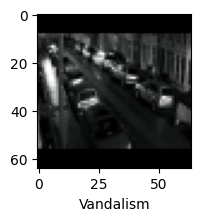

In [4]:
plot_sample(X_train,y_train,9)

In [13]:
cnn = models.Sequential([
    #cnn
    Input(shape=(64,64,3)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense_network
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(14, activation='softmax')
])

cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [14]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 58s 113ms/step - accuracy: 0.8498 - loss: 0.5838
Epoch 2/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.9959 - loss: 0.0200
Epoch 3/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 56s 112ms/step - accuracy: 0.9979 - loss: 0.0084
Epoch 4/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 79s 107ms/step - accuracy: 0.9977 - loss: 0.0086
Epoch 5/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.9984 - loss: 0.0066
Epoch 6/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9982 - loss: 0.0062
Epoch 7/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.9987 - loss: 0.0052
Epoch 8/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.9980 - loss: 0.0060
Epoch 9/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 85s 113ms/step - accuracy: 0.9977 - loss: 0.0078
Epoch 10/10
501/501 ━━━━━━━━━━━━━━━━━━━━ 77s 103ms/step - accuracy: 0.9975 - loss: 0.0072


In [15]:
cnn.evaluate(X_test,y_test)

126/126 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9976 - loss: 0.0098


[0.012687780894339085, 0.9962518811225891]

In [35]:
y_pred= cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification_report\n",classification_report(y_test,y_pred_classes))
y_pred_classes[:5]

126/126 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step
classification_report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       102
           1       1.00      1.00      1.00        98
           2       0.99      1.00      0.99       295
           3       0.99      0.98      0.98       151
           4       1.00      1.00      1.00       108
           5       1.00      0.98      0.99       107
           6       1.00      1.00      1.00       156
           7       0.98      1.00      0.99        47
           8       1.00      1.00      1.00       129
           9       1.00      1.00      1.00       148
          10       0.99      0.99      0.99       136
          11       1.00      1.00      1.00       130
          12       1.00      1.00      1.00       154
          13       1.00      1.00      1.00      2241

    accuracy                           1.00      4002
   macro avg       0.99      1.00      1.00      4002
weighted avg   

[13, 8, 13, 13, 3]

In [24]:
y_test[:5]


array([13,  8, 13, 13,  3])

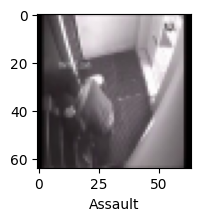

In [33]:
plot_sample(X_test,y_test,4)

In [34]:
class_names[y_pred_classes[4]]

'Assault'